In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Belajar\ di\ BisaAi/Data\ Science/OJT/Sentiment\ Analysis

/content/gdrive/MyDrive/Belajar di BisaAi/Data Science/OJT/Sentiment Analysis


In [ ]:
import pandas as pd
import glob

In [ ]:
#Membaca semua data kemudian menggabungkannya menjadi satu
df = pd.DataFrame(columns=['Package Name', 'App Version Code', 'App Version Name',
       'Reviewer Language', 'Device', 'Review Submit Date and Time',
       'Review Submit Millis Since Epoch', 'Review Last Update Date and Time',
       'Review Last Update Millis Since Epoch', 'Star Rating', 'Review Title',
       'Review Text', 'Developer Reply Date and Time',
       'Developer Reply Millis Since Epoch', 'Developer Reply Text',
       'Review Link'])
files = glob.glob(r'*.csv')
for f in files:
    Data = pd.read_csv(f,sep=',',encoding="utf-16")
    df = pd.concat([Data,df])
    print(df.shape)

df.head()


(33, 16)
(39, 16)
(46, 16)
(47, 16)
(58, 16)
(96, 16)
(126, 16)
(165, 16)
(176, 16)
(185, 16)
(191, 16)


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link
0,com.pos.bisaaiacademy,65.0,2.0.0.6,en,tiffany,2021-06-06T11:30:25Z,1622979025966,2021-06-07T00:09:34Z,1623024574985,5,NaN,NaN,NaN,NaN,NaN,NaN
1,com.pos.bisaaiacademy,NaN,NaN,id,santoni,2021-06-10T17:21:23Z,1623345683004,2021-06-10T18:23:58Z,1623349438270,1,NaN,"Gak recommended course nya, pas nanya materi k...",NaN,NaN,NaN,http://play.google.com/console/developers/5503...
2,com.pos.bisaaiacademy,65.0,2.0.0.6,en,OP4C7D,2021-06-12T15:46:23Z,1623512783990,2021-06-12T15:46:23Z,1623512783990,5,NaN,NaN,NaN,NaN,NaN,NaN
3,com.pos.bisaaiacademy,65.0,2.0.0.6,en,2026,2021-06-13T06:25:22Z,1623565522147,2021-06-13T06:25:22Z,1623565522147,5,NaN,NaN,NaN,NaN,NaN,NaN
4,com.pos.bisaaiacademy,65.0,2.0.0.6,en,a21s,2021-06-14T11:14:03Z,1623669243874,2021-06-14T11:14:03Z,1623669243874,5,NaN,Best AI Training apps,2021-06-19T09:13:07Z,1.624094e+12,"Hai Kak Tresno Games, Terima kasih atas sarann...",http://play.google.com/console/developers/5503...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 32
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Package Name                           191 non-null    object 
 1   App Version Code                       151 non-null    float64
 2   App Version Name                       151 non-null    object 
 3   Reviewer Language                      191 non-null    object 
 4   Device                                 190 non-null    object 
 5   Review Submit Date and Time            191 non-null    object 
 6   Review Submit Millis Since Epoch       191 non-null    object 
 7   Review Last Update Date and Time       191 non-null    object 
 8   Review Last Update Millis Since Epoch  191 non-null    object 
 9   Star Rating                            191 non-null    object 
 10  Review Title                           0 non-null      float64
 11  Review 

In [ ]:
# Membuat new_df dari df
new_df = df[['Star Rating','Review Text']]
new_df.head()

,Star Rating,Review Text
0,5,NaN
1,1,"Gak recommended course nya, pas nanya materi k..."
2,5,NaN
3,5,NaN
4,5,Best AI Training apps


In [ ]:
#Menambahkan kolom sentiment
sentiment = []
for _, row in new_df.iterrows():
  if row['Star Rating'] >= 4:
    sentiment.append('Positif')
  elif row['Star Rating'] == 3:
    sentiment.append('Netral')
  else:
    sentiment.append('Negatif')

new_df['Sentiment'] = sentiment
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Star Rating,Review Text,Sentiment
0,5,NaN,Positif
1,1,"Gak recommended course nya, pas nanya materi k...",Negatif
2,5,NaN,Positif
3,5,NaN,Positif
4,5,Best AI Training apps,Positif


In [ ]:
import numpy as np
#mengganti comment kosong yg positif menjadi bagus
new_df['Review Text'] = np.where((new_df['Review Text'].isna() & new_df.Sentiment.str.contains('Positif')),'bagus',new_df['Review Text'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
new_df.isna().sum()

Star Rating    0
Review Text    3
Sentiment      0
dtype: int64

In [ ]:
#mengganti comment kosong yg selain yg positif menjadi nocomment
new_df['Review Text'] = new_df['Review Text'].fillna('nocomment')
new_df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Star Rating    0
Review Text    0
Sentiment      0
dtype: int64

In [ ]:
#Melihat Persebaran Datanya
new_df.groupby(['Sentiment','Star Rating'])['Review Text'].count()

Sentiment  Star Rating
Negatif    1                7
           2                7
Netral     3                5
Positif    4                9
           5              163
Name: Review Text, dtype: int64

In [ ]:
print(new_df['Review Text'].values)

['bagus'
 'Gak recommended course nya, pas nanya materi ke mentornya malah dibatasi topiknya padahal masih relevan sama course yg diambil, waktu itu dikasih cp mentor tpi chat gak dibales balas sampe waktu workshop nya habis gak ada balasan, materi juga gak jelas cmn implementasi doang gak ada penjelasan metode nya, youtube lebih membantu sih dibanding ini, semoga bisa di upgrade lgi kualitas mentor dan materinya'
 'bagus' 'bagus' 'Best AI Training apps'
 'Jangan buat aplikasi dah kalo kagak bisa dipake' 'bagus'
 'Gudangnya pengetahuan.' 'bagus' 'bagus' 'bagus' 'bagus'
 'Untuk kelas excel for analytic nilai quiz nya di perbaiki dong, masa 1 soal nilai nya 5point untuk 10 soal, kalau bener semua cuman dapet 50 sedangkan minimal lulus harus 80'
 'bagus'
 'Aplikasinya bagus, akan tetapi ada saran untuk tampilan. Tulisan pada materi di silabus kecil sekali, rumus terkadang tidak muncul. Untuk kompetisi dibedakan dong yang sudah lewat sama yang sedang berlangsung.'
 'bagus' 'Sangat membantu

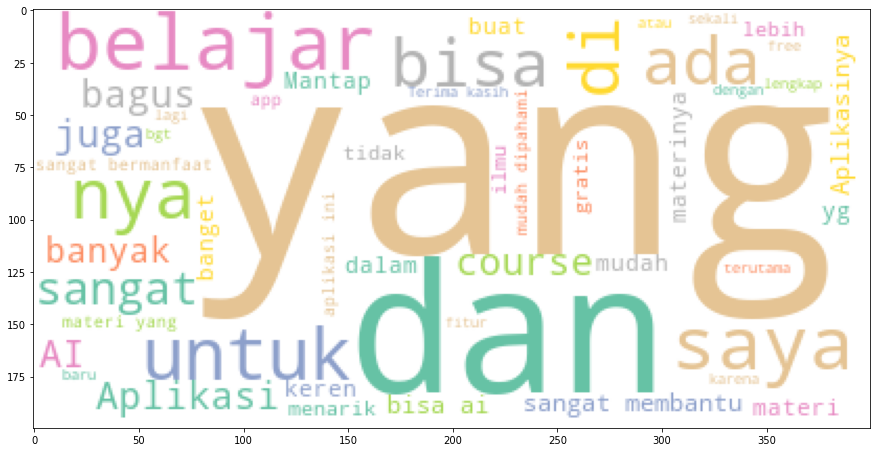

In [ ]:
#Lihat persebaran kata di review text yang positif
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Positif')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

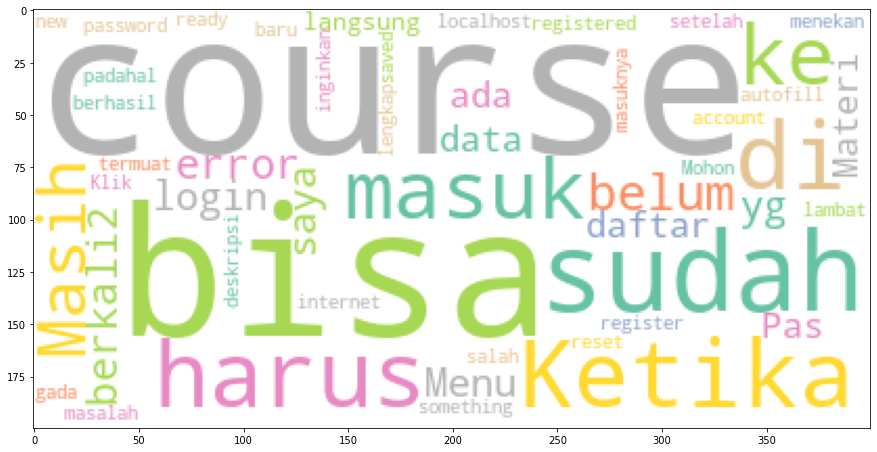

In [ ]:
#Lihat persebaran kata di review text yang netral
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Netral')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

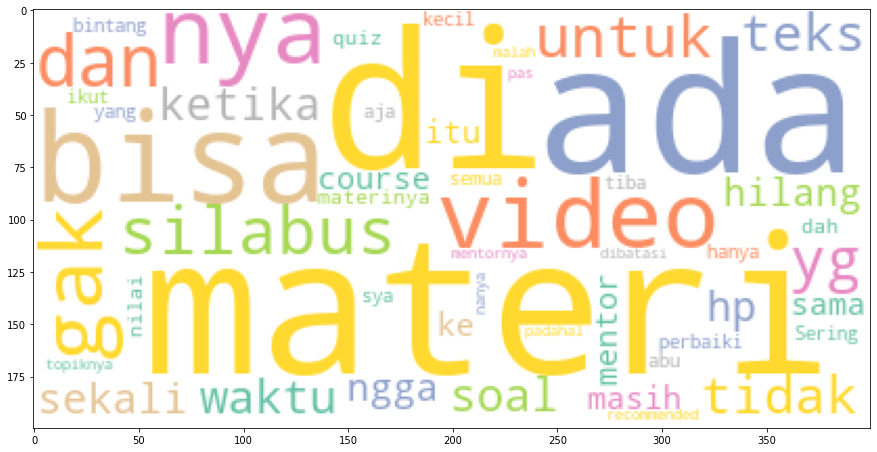

In [ ]:
#Lihat persebaran kata di review text yang negatif
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Negatif')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

# Preprocessing Text

In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 26.8MB/s 


In [ ]:
#Pre Process Text untuk menghilangkan stop word
from nltk.tokenize import sent_tokenize, word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import re
import string

def pre_process(text):
    # Case Folding: Lowercase
    # Merubah format teks menjadi format huruf kecil semua (lowercase).
    text = text.lower()

    # Case Folding: Removing Number
    # Menghapus karakter angka.
    text = re.sub(r"\d+", "", text)
    # Menghapus kata yg kurang dari 4 huruf
    text = re.sub(r'\b\w{1,3}\b', '', text)

    # Case Folding: Removing Punctuation
    # Menghapus karakter tanda baca.
    text = text.translate(str.maketrans("","",string.punctuation))

    #Case Folding: Removing Whitespace
    #Menghapus karakter kosong.
    text = text.strip()

    #Menghapus emote icon
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    text = emoji_pattern.sub(r'', text) # no emoji
    
    #Separating Sentences with Split () Method
    #Fungsi split() memisahkan string ke dalam list dengan spasi sebagai pemisah jika tidak ditentukan pemisahnya.
    pisah = text.split()
    # atau dengan re.split(r'\s+',text)

    #Filtering using sastrawi   
    # Ambil Stopword bawaan
    stop_factory = StopWordRemoverFactory().get_stop_words()
    more_stopword = ['dengan', 'ia','bahwa','oleh','ngga','jadi','doang','yg','tdk']
    # Merge stopword
    data = stop_factory + more_stopword
    # Menfilter stopword dengan tambahan stopword baru
    dictionary = ArrayDictionary(data)
    stopword = StopWordRemover(dictionary)
    text =  stopword.remove(text)

    return text

new_df['Review Text'] = new_df['Review Text'].apply(lambda x:pre_process(x))
new_df.head()

,Review Text,Sentiment
0,bagus,Positif
1,recommended course nanya materi mentornya m...,Negatif
2,bagus,Positif
3,bagus,Positif
4,best training apps,Positif


## Cek Stop Word dalam bahasa Indonesia

In [ ]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

## Cek Stop Word dalam bahasa inggris

In [ ]:
from sklearn.feature_extraction import text
print(text.ENGLISH_STOP_WORDS)

frozenset({'but', 'sixty', 'any', 'himself', 'after', 'often', 'mine', 'here', 'back', 'etc', 'now', 'can', 'ever', 'then', 'go', 'every', 'sincere', 'when', 'which', 'us', 'whence', 'must', 'two', 'under', 'these', 'well', 'your', 'everywhere', 'couldnt', 'wherein', 'off', 'wherever', 'down', 'themselves', 'few', 'whereafter', 'least', 'her', 'top', 'too', 'onto', 'besides', 'myself', 'thru', 'upon', 'beside', 'formerly', 'another', 'anywhere', 'those', 'beforehand', 'whenever', 'could', 'four', 'during', 'eight', 'becoming', 'being', 'was', 'though', 'name', 'no', 'would', 'front', 'mostly', 'will', 'because', 'made', 'there', 'only', 'over', 'move', 'hereby', 'sometimes', 'herself', 'once', 'none', 'since', 'due', 'except', 'many', 'who', 'cant', 'find', 'whom', 'the', 'much', 'she', 'six', 'without', 'again', 'side', 'seem', 'behind', 'fifty', 'rather', 'up', 'yet', 'together', 'above', 'might', 'first', 'detail', 'become', 'via', 'elsewhere', 'may', 'sometime', 'call', 'thereafter

In [ ]:
print(new_df['Review Text'].values)

['bagus'
 'recommended course   nanya materi  mentornya malah dibatasi topiknya padahal relevan sama course  diambil waktu  dikasih  mentor  chat  dibales balas sampe waktu workshop  habis   balasan materi  jelas  implementasi   penjelasan metode  youtube lebih membantu  dibanding  semoga  upgrade  kualitas mentor  materinya'
 'bagus' 'bagus' 'best  training apps'
 'jangan buat aplikasi  kalo kagak dipake' 'bagus' 'gudangnya pengetahuan'
 'bagus' 'bagus' 'bagus' 'bagus'
 'kelas excel  analytic nilai quiz   perbaiki dong masa  soal nilai  point  soal kalau bener semua cuman dapet  minimal lulus'
 'bagus'
 'aplikasinya bagus  saran tampilan tulisan materi  silabus kecil sekali rumus terkadang muncul kompetisi dibedakan dong lewat sama sedang berlangsung'
 'bagus' 'sangat membantu' 'nocomment'
 'course  nilai kuisnya mentok    padahal jawabannya yakin benar berkali dicek  disesuaikan materi mohon bantuannya'
 'bagus'
 'aplikasi anak bangsa luar biasa sangat membantu orang terjun kedunia  

In [ ]:
#melihat token dari row ke 5
for i in range(0,len(sequences)):
  print(f'kalimat row {i}')
  for x in sequences[i]:
    print(f'{x} : {tokenizer.index_word[x]}')
  print('')

kalimat row 0
1 : bagus

kalimat row 1
39 : recommended
6 : course
227 : nanya
4 : materi
228 : mentornya
132 : malah
229 : dibatasi
230 : topiknya
59 : padahal
231 : relevan
46 : sama
6 : course
232 : diambil
83 : waktu
233 : dikasih
133 : mentor
234 : chat
235 : dibales
236 : balas
237 : sampe
83 : waktu
238 : workshop
239 : habis
240 : balasan
4 : materi
134 : jelas
241 : implementasi
84 : penjelasan
242 : metode
243 : youtube
19 : lebih
8 : membantu
244 : dibanding
60 : semoga
245 : upgrade
246 : kualitas
133 : mentor
13 : materinya

kalimat row 2
1 : bagus

kalimat row 3
1 : bagus

kalimat row 4
247 : best
248 : training
40 : apps

kalimat row 5
85 : jangan
11 : buat
5 : aplikasi
61 : kalo
249 : kagak
250 : dipake

kalimat row 6
1 : bagus

kalimat row 7
251 : gudangnya
62 : pengetahuan

kalimat row 8
1 : bagus

kalimat row 9
1 : bagus

kalimat row 10
1 : bagus

kalimat row 11
1 : bagus

kalimat row 12
27 : kelas
252 : excel
253 : analytic
86 : nilai
41 : quiz
135 : perbaiki
87 : d

In [ ]:
len(sequences)

191

# Melihat grafik persebaran perkata & 2 kata

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

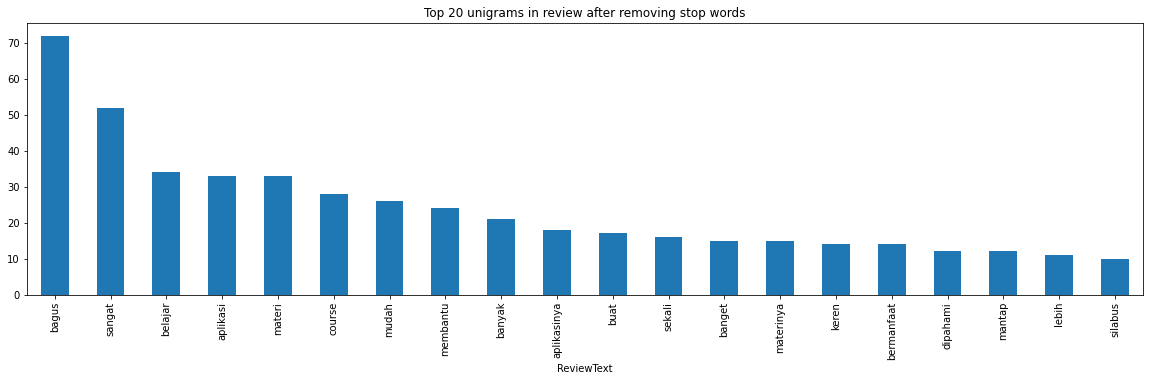

In [ ]:
common_words = top_n_ngram(new_df['Review Text'], 20,1)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(20,5))
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in review after removing stop words')

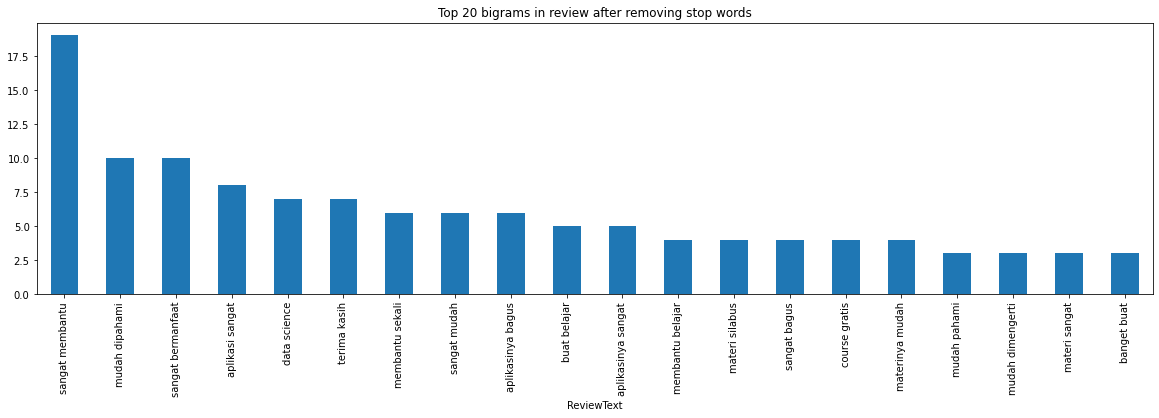

In [ ]:
common_words = top_n_ngram(new_df['Review Text'], 20,2)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(20,5))
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 bigrams in review after removing stop words')

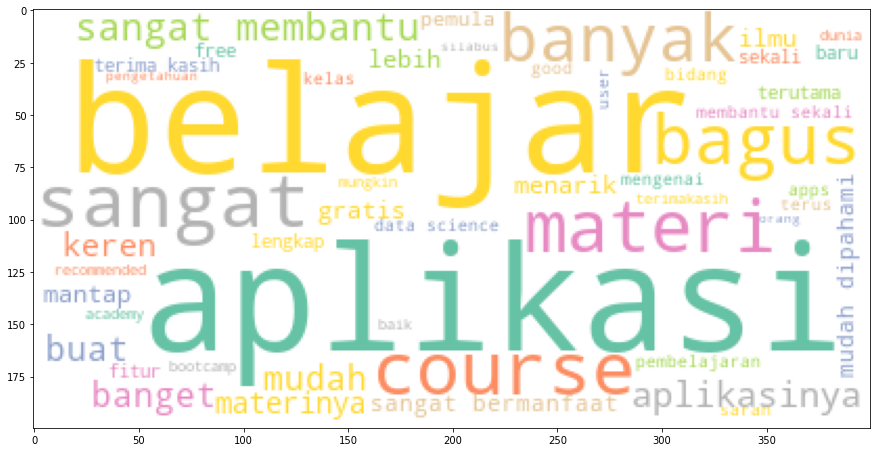

In [ ]:
#Lihat persebaran kata di review text nya setelah di pre process
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Positif')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

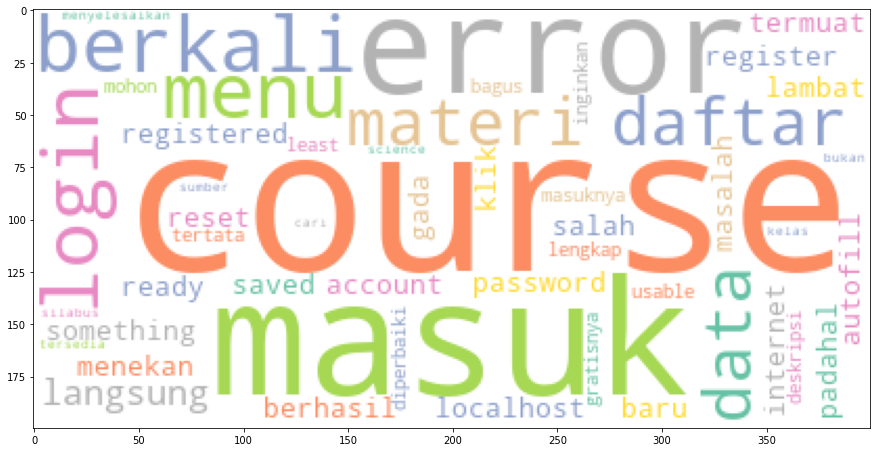

In [ ]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Netral')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

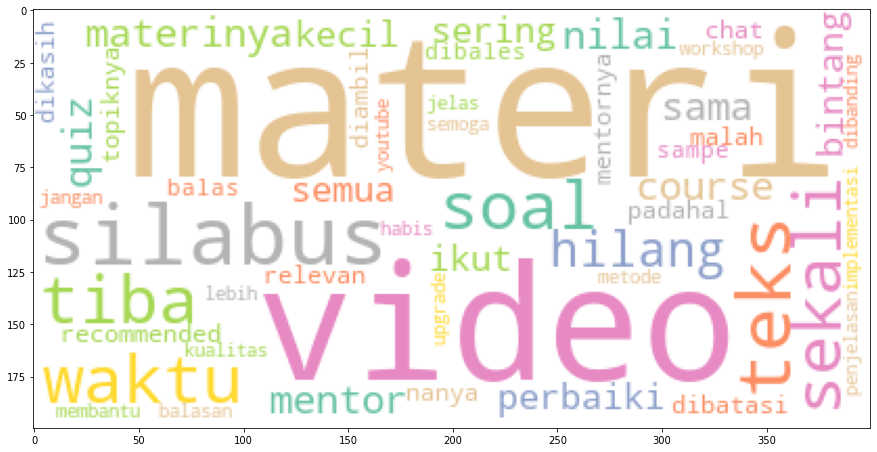

In [ ]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Negatif')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

In [ ]:
#drop column Star Rating
new_df = new_df.drop(columns=['Star Rating'])

KeyError: ignored

# Pembuatan Model

## Convert ke array data dari sequence (token)

In [ ]:
# #Merubah nilai target dari string ke array
# from sklearn.preprocessing import OneHotEncoder

# X = OneHotEncoder(sparse=False).fit_transform(

#   new_df['Review Text'].to_numpy().reshape(-1, 1)

# )

In [ ]:
y = new_df['Sentiment']
X = new_df['Review Text']
print(y.value_counts())

#Merubah nilai target dari string ke numerik
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
print(pd.DataFrame(y).value_counts())

Positif    172
Negatif     14
Netral       5
Name: Sentiment, dtype: int64
2    172
0     14
1      5
dtype: int64


In [ ]:
X.shape

(191,)

In [ ]:
y.shape

(191,)

# Features Extraction dengan pad_sequences

# Tokennize Text

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_df['Review Text'])
word_index = tokenizer.word_index

X_padded = tokenizer.texts_to_sequences(new_df['Review Text'])
X_padded = pad_sequences(X_padded,maxlen=50) #maxlen mensetting panjang array nya biar 50 column
X_padded.shape

(191, 50)

In [ ]:
word_index

{'abis': 285,
 'academy': 58,
 'academynya': 384,
 'account': 509,
 'adanya': 618,
 'advance': 578,
 'akademi': 589,
 'akhir': 462,
 'akhirnya': 126,
 'akses': 215,
 'alangkah': 474,
 'alatnya': 213,
 'alhamdulillah': 189,
 'aljabar': 443,
 'alur': 303,
 'ambil': 595,
 'anak': 144,
 'analytic': 253,
 'android': 483,
 'aplikasi': 5,
 'aplikasinya': 10,
 'application': 150,
 'applikasi': 576,
 'applikasinya': 346,
 'appnya': 531,
 'apps': 40,
 'appsss': 409,
 'appstapi': 563,
 'artificial': 328,
 'ataupun': 436,
 'auto': 422,
 'autofill': 517,
 'awalnya': 613,
 'awam': 101,
 'bagaimana': 157,
 'bagus': 1,
 'bagusnya': 491,
 'bahasa': 349,
 'bahasanya': 402,
 'baik': 57,
 'balas': 236,
 'balasan': 240,
 'banget': 14,
 'bangettt': 612,
 'bangsa': 145,
 'bantuannya': 267,
 'banyak': 9,
 'baru': 25,
 'basic': 151,
 'bayar': 456,
 'beasiswa': 580,
 'beberapa': 187,
 'behh': 621,
 'belajar': 3,
 'beli': 545,
 'beljar': 468,
 'benar': 143,
 'benarbenar': 459,
 'bener': 254,
 'berbagai': 179,
 '

In [ ]:
# Me reverse hasil array menjadi text
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '0') for i in text])

print(decode_review(X_padded[1]))

0 0 0 0 0 0 0 0 0 0 0 0 recommended course nanya materi mentornya malah dibatasi topiknya padahal relevan sama course diambil waktu dikasih mentor chat dibales balas sampe waktu workshop habis balasan materi jelas implementasi penjelasan metode youtube lebih membantu dibanding semoga upgrade kualitas mentor materinya


In [ ]:
word_index.items()

dict_items([('bagus', 1), ('sangat', 2), ('belajar', 3), ('materi', 4), ('aplikasi', 5), ('course', 6), ('mudah', 7), ('membantu', 8), ('banyak', 9), ('aplikasinya', 10), ('buat', 11), ('sekali', 12), ('materinya', 13), ('banget', 14), ('keren', 15), ('bermanfaat', 16), ('mantap', 17), ('dipahami', 18), ('lebih', 19), ('silabus', 20), ('ilmu', 21), ('data', 22), ('gratis', 23), ('menarik', 24), ('baru', 25), ('video', 26), ('kelas', 27), ('pemula', 28), ('lengkap', 29), ('kasih', 30), ('science', 31), ('fitur', 32), ('good', 33), ('free', 34), ('terutama', 35), ('terima', 36), ('mengenai', 37), ('pembelajaran', 38), ('recommended', 39), ('apps', 40), ('quiz', 41), ('saran', 42), ('user', 43), ('terus', 44), ('bidang', 45), ('sama', 46), ('soal', 47), ('great', 48), ('learning', 49), ('dunia', 50), ('mungkin', 51), ('sedikit', 52), ('bootcamp', 53), ('terimakasih', 54), ('download', 55), ('langsung', 56), ('baik', 57), ('academy', 58), ('padahal', 59), ('semoga', 60), ('kalo', 61), ('pe

Class=2, n=172 (90.052%)
Class=0, n=14 (7.330%)
Class=1, n=5 (2.618%)


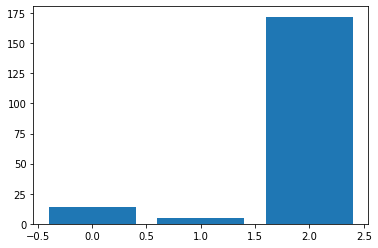

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=2, n=172 (33.333%)
Class=0, n=172 (33.333%)
Class=1, n=172 (33.333%)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


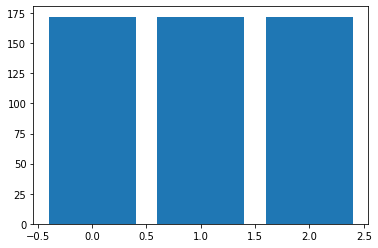

In [ ]:
#Me resampling imbalance data (target nya ngak imbang)
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE(k_neighbors=2)
X_padded, y = oversample.fit_resample(X_padded, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
pd.DataFrame(X_padded)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,39,6,227,4,228,132,229,230,59,231,46,6,232,83,233,133,234,235,236,237,83,238,239,240,4,134,241,84,242,243,19,8,244,60,245,246,133,13
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247,248,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,15,12,18,47,11,12,2,72,364,181,542
512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,97,452,161,111,132,471,35,138
513,0,0,0,0,0,0,0,0,0,0,0,472,192,473,110,474,474,475,86,476,477,200,201,478,54,479,480,481,23,76,202,482,483,102,484,189,485,5,486,5,86,76,487,26,5,97,87,496,504,528
514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,12,9,13,36,8,9,1,55,308,189,544


## Memisah antara data latih dan test

In [ ]:
from sklearn.model_selection import train_test_split
# Create a train-test split of these variables
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size = 0.2, random_state=1)
print("Training data size : ", X_train.shape)
print("Test data size : ", X_test.shape)

Training data size :  (412, 50)
Test data size :  (104, 50)


In [ ]:
X_train

array([[  0,   0,   0, ..., 529,   6,  71],
       [  0,   0,   0, ..., 242, 243, 296],
       [  0,   0,   0, ..., 484,   7,  18],
       ...,
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ..., 298, 213, 235],
       [  0,   0,   0, ...,  33, 150,  49]], dtype=int32)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn import metrics


# LSVC_model = Pipeline([
#                        ('tfidf', TfidfTransformer()),
#                        ('clf', LinearSVC())
#                      ])
LSVC_model = LinearSVC()
LSVC_model.fit(X_train, y_train)
LSVC_predictions = LSVC_model.predict(X_test)
print(metrics.confusion_matrix(y_test,LSVC_predictions))
print(metrics.classification_report(y_test,LSVC_predictions))
print(metrics.accuracy_score(LSVC_predictions, y_test))

[[32  0  6]
 [ 0 35  0]
 [ 6  2 23]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        38
           1       0.95      1.00      0.97        35
           2       0.79      0.74      0.77        31

    accuracy                           0.87       104
   macro avg       0.86      0.86      0.86       104
weighted avg       0.86      0.87      0.86       104

0.8653846153846154


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# NB_model = Pipeline([
#                        ('tfidf', TfidfTransformer()),
#                        ('clf', MultinomialNB())
#                      ])
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
NB_predictions = NB_model.predict(X_test)
print(metrics.confusion_matrix(y_test,NB_predictions))
print(metrics.classification_report(y_test,NB_predictions))
print(metrics.accuracy_score(NB_predictions, y_test))

[[23 12  3]
 [ 3 32  0]
 [ 8 15  8]]
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        38
           1       0.54      0.91      0.68        35
           2       0.73      0.26      0.38        31

    accuracy                           0.61       104
   macro avg       0.65      0.59      0.57       104
weighted avg       0.65      0.61      0.58       104

0.6057692307692307


In [ ]:
# RF_model = Pipeline([('tfidf', TfidfTransformer()),
#                      ('clf', RandomForestClassifier())])
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
RF_predictions = RF_model.predict(X_test)
print(metrics.confusion_matrix(y_test,RF_predictions))
print(metrics.classification_report(y_test,RF_predictions))
print(metrics.accuracy_score(RF_predictions, y_test))

[[28  0 10]
 [ 0 35  0]
 [ 1  1 29]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84        38
           1       0.97      1.00      0.99        35
           2       0.74      0.94      0.83        31

    accuracy                           0.88       104
   macro avg       0.89      0.89      0.88       104
weighted avg       0.90      0.88      0.88       104

0.8846153846153846


In [ ]:
# MLP_model = Pipeline([('tfidf', TfidfTransformer()),
#                      ('clf', MLPClassifier())])
MLP_model = MLPClassifier()
MLP_model.fit(X_train,y_train)
MLP_predictions = MLP_model.predict(X_test)
print(metrics.confusion_matrix(y_test,MLP_predictions))
print(metrics.classification_report(y_test,MLP_predictions))
print(metrics.accuracy_score(MLP_predictions, y_test))

[[36  0  2]
 [ 0 35  0]
 [ 5  0 26]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       1.00      1.00      1.00        35
           2       0.93      0.84      0.88        31

    accuracy                           0.93       104
   macro avg       0.94      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104

0.9326923076923077


# Test Model dengan data baru

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sample_string = "materinya lengkap"

tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_df['Review Text']) #Tokenize text dari data latih
word_index = tokenizer.word_index

sample = tokenizer.texts_to_sequences([sample_string])
sample_string_padded = pad_sequences(sample,maxlen=50) #menset panjang kolomnya 50 agar sama dengan ketika data di train
sample_string_padded.shape

(1, 50)

In [ ]:
sample_string_padded

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        13, 29]], dtype=int32)

In [ ]:
print(decode_review(sample_string_padded[0]))

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 materinya lengkap


In [ ]:
print(LSVC_model.predict(sample_string_padded))
print(NB_model.predict(sample_string_padded))
print(RF_model.predict(sample_string_padded))
print(MLP_model.predict(sample_string_padded))


[2]
[0]
[2]
[2]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sample_string = "jelek dan nggak guna nih applikasi"

tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_df['Review Text']) #Tokenize text dari data latih
word_index = tokenizer.word_index

sample = tokenizer.texts_to_sequences([sample_string])
sample_string_padded = pad_sequences(sample,maxlen=50)
sample_string_padded.shape

(1, 50)

In [ ]:
print(decode_review(sample_string_padded[0]))

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 applikasi


In [ ]:
print(LSVC_model.predict(sample_string_padded))
print(NB_model.predict(sample_string_padded))
print(RF_model.predict(sample_string_padded))
print(MLP_model.predict(sample_string_padded))


[0]
[1]
[2]
[0]


In [ ]:
# from keras.models import load_model

# model.save('Waris_LSTM-SentimentAnalysis.h5')  # creates a HDF5 file 'my_model.h5'




In [ ]:
# # returns a compiled model
# model = load_model('Waris_LSTM-SentimentAnalysis.h5')